In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore')

#### **Uploading the Pawning Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pawning_NPA_Analysis.csv to Pawning_NPA_Analysis.csv


In [ ]:
import io
pawndata = pd.read_csv(io.BytesIO(uploaded['Pawning_NPA_Analysis.csv']))
pawndata.head()

,TICKETNO,ADV_DATE,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,TICKET_AGE,CLASSIFI_BUCKET
0,40095548,31-Oct-22,4,30100.00,2.47,30100.00,309.25,0.0,21.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A
1,60179907,31-Oct-22,6,66116.11,10.36,66116.11,679.28,0.0,21.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A
2,30070656,31-Oct-22,3,180000.00,14.80,180000.00,1849.32,0.0,21.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A
3,100329012,31-Oct-22,10,123539.00,15.62,123539.00,1269.24,0.0,19.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A
4,50158494,31-Oct-22,5,130000.00,13.93,130000.00,1335.62,0.0,18.0,25.0,Pawning - Normal Scheme,F,Agriculture,Agriculture Others,0,1A


####**Preproceessing of data**

In [ ]:
pawndata.shape

(23718, 16)

In [ ]:
pawndata.columns

Index(['TICKETNO', 'ADV_DATE', 'BRANCHID', 'ADV_AMOUNT', 'NETWEIGHT',
       'CAP_AMOUNT', 'ACCR_INTEREST', 'CAPITAL_PAY', 'AVG_KARATAGE',
       'PRODUCTINTEREST', 'PRODUCTNAME', 'GENDER', 'SECTOR_DESC',
       'SUBSECTOR_DESC', 'TICKET_AGE', 'CLASSIFI_BUCKET'],
      dtype='object')

In [ ]:
# Checking missing or null values in the data set

pawndata.isnull().sum()

TICKETNO           0
ADV_DATE           0
BRANCHID           0
ADV_AMOUNT         0
NETWEIGHT          0
CAP_AMOUNT         0
ACCR_INTEREST      0
CAPITAL_PAY        0
AVG_KARATAGE       0
PRODUCTINTEREST    0
PRODUCTNAME        0
GENDER             0
SECTOR_DESC        0
SUBSECTOR_DESC     0
TICKET_AGE         0
CLASSIFI_BUCKET    0
dtype: int64

In [ ]:
pawndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23718 entries, 0 to 23717
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TICKETNO         23718 non-null  int64  
 1   ADV_DATE         23718 non-null  object 
 2   BRANCHID         23718 non-null  int64  
 3   ADV_AMOUNT       23718 non-null  float64
 4   NETWEIGHT        23718 non-null  float64
 5   CAP_AMOUNT       23718 non-null  float64
 6   ACCR_INTEREST    23718 non-null  float64
 7   CAPITAL_PAY      23718 non-null  float64
 8   AVG_KARATAGE     23718 non-null  float64
 9   PRODUCTINTEREST  23718 non-null  float64
 10  PRODUCTNAME      23718 non-null  object 
 11  GENDER           23718 non-null  object 
 12  SECTOR_DESC      23718 non-null  object 
 13  SUBSECTOR_DESC   23718 non-null  object 
 14  TICKET_AGE       23718 non-null  int64  
 15  CLASSIFI_BUCKET  23718 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory usage: 2.9+ MB


In [ ]:
pawndata.describe()

,TICKETNO,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,TICKET_AGE
count,2.371800e+04,23718.000000,2.371800e+04,23718.000000,2.371800e+04,23718.000000,2.371800e+04,23718.000000,23718.000000,23718.000000
mean,7.146512e+07,7.127161,1.427249e+05,17.605413,1.385468e+05,8164.329876,4.178090e+03,18.870007,16.965960,182.199553
std,2.460813e+07,2.453312,1.940340e+05,20.663653,1.894031e+05,12618.820715,3.061569e+04,1.897583,5.807343,236.209352
min,1.003606e+07,1.000000,2.100000e+03,1.610000,1.495700e+02,0.000000,0.000000e+00,14.000000,8.000000,0.000000
25%,6.017415e+07,6.000000,5.000000e+04,7.350000,4.726059e+04,2097.607500,0.000000e+00,18.000000,10.000000,76.000000
50%,7.019592e+07,7.000000,8.520000e+04,11.470000,8.310000e+04,4565.910000,0.000000e+00,19.000000,20.000000,165.000000
75%,1.003187e+08,10.000000,1.627900e+05,20.157500,1.583932e+05,9356.867500,0.000000e+00,20.000000,20.040000,248.000000
max,1.003290e+08,10.000000,9.800000e+06,800.000000,9.800000e+06,621830.160000,1.297479e+06,24.000000,26.040000,7741.000000


In [ ]:
median_PRODUCTINTEREST = pawndata['PRODUCTINTEREST'].median(skipna=True)
median_PRODUCTINTEREST

20.0

In [ ]:
pawndata_C = pawndata.replace({'PRODUCTINTEREST': {0: median_PRODUCTINTEREST}})

In [ ]:
pawndata_C.describe() # Interest 0 had replaced with median value. now MIN values is 8.

,TICKETNO,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,TICKET_AGE
count,2.371800e+04,23718.000000,2.371800e+04,23718.000000,2.371800e+04,23718.000000,2.371800e+04,23718.000000,23718.000000,23718.000000
mean,7.146512e+07,7.127161,1.427249e+05,17.605413,1.385468e+05,8164.329876,4.178090e+03,18.870007,16.965960,182.199553
std,2.460813e+07,2.453312,1.940340e+05,20.663653,1.894031e+05,12618.820715,3.061569e+04,1.897583,5.807343,236.209352
min,1.003606e+07,1.000000,2.100000e+03,1.610000,1.495700e+02,0.000000,0.000000e+00,14.000000,8.000000,0.000000
25%,6.017415e+07,6.000000,5.000000e+04,7.350000,4.726059e+04,2097.607500,0.000000e+00,18.000000,10.000000,76.000000
50%,7.019592e+07,7.000000,8.520000e+04,11.470000,8.310000e+04,4565.910000,0.000000e+00,19.000000,20.000000,165.000000
75%,1.003187e+08,10.000000,1.627900e+05,20.157500,1.583932e+05,9356.867500,0.000000e+00,20.000000,20.040000,248.000000
max,1.003290e+08,10.000000,9.800000e+06,800.000000,9.800000e+06,621830.160000,1.297479e+06,24.000000,26.040000,7741.000000


In [ ]:
# Categorical variables

pawndata.describe(include=['O'])

,ADV_DATE,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,CLASSIFI_BUCKET
count,23718,23718,23718,23718,23718,23718
unique,669,6,2,3,12,8
top,31-Oct-22,Pawning - Normal Scheme,F,Consumption,Consumption,1A
freq,188,23069,12241,13869,13869,22568


#### **Outlier Analysis**

***For Capital Amount***

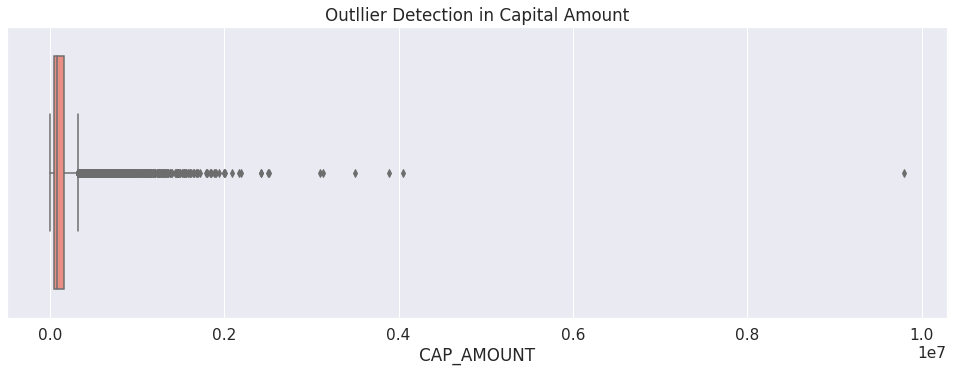

In [ ]:
plt.figure(figsize=(15,5))

fig_outlier_one = sns.boxplot(x = pawndata_C["CAP_AMOUNT"],color = 'salmon').set(title = "Outllier Detection in Capital Amount")

plt.show()

***Removing outliers in Capital Amount***

In [ ]:
# def capture_outliers(col_name, df_in):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outliers = (df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)
#     df_out = df_in.loc[outliers]

#     return df_out

# out = capture_outliers('CAP_AMOUNT', pawndata_C)

In [ ]:
def remove_outlier(data_in, col_name):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)

    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = data_in.loc[(data_in[col_name] > fence_low) & (data_in[col_name] < fence_high)]

    return data_out

In [ ]:
pawndata_CC = remove_outlier(pawndata_C,"CAP_AMOUNT")

In [ ]:
pawndata_CC.shape

(21698, 16)

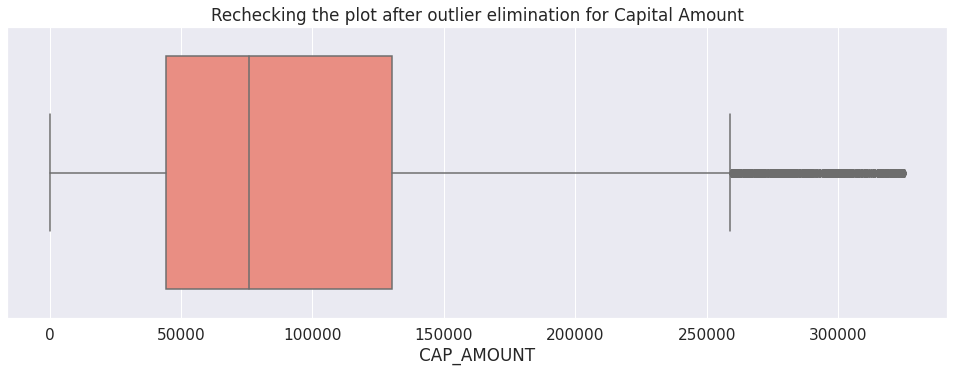

In [ ]:
plt.figure(figsize=(15,5))

fig_outlier_two = sns.boxplot(x = pawndata_CC["CAP_AMOUNT"], color = 'salmon').set(title = "Rechecking the plot after outlier elimination for Capital Amount")

plt.show()


***For Redemption Dates***

**Removing outliers in Redemption Dates**

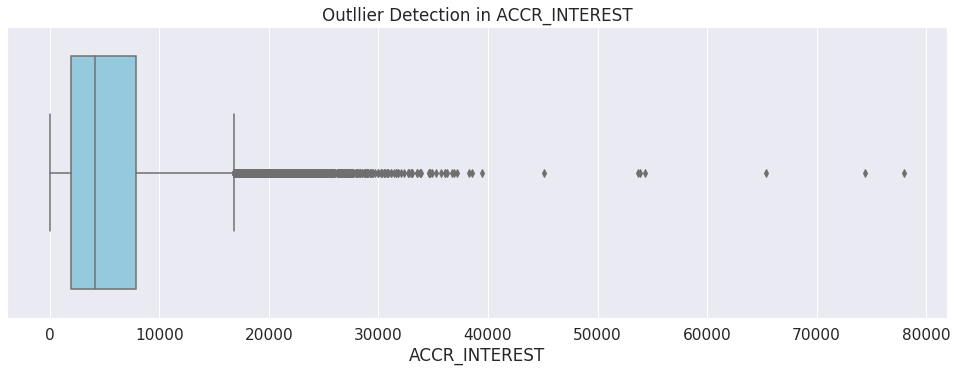

In [ ]:
plt.figure(figsize=(15,5))

fig_outlier_three = sns.boxplot(x = pawndata_CC["ACCR_INTEREST"],color = 'skyblue').set(title = "Outllier Detection in ACCR_INTEREST")

plt.show()

In [ ]:
# def capture_outliers(col_name, df_in):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outliers = (df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)
#     df_out = df_in.loc[outliers]

#     return df_out

# out = capture_outliers('ACCR_INTEREST', pawndata_CC)

In [ ]:
def remove_outlier(data_in, col_name):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)

    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = data_in.loc[(data_in[col_name] > fence_low) & (data_in[col_name] < fence_high)]

    return data_out

In [ ]:
pawndata_CCC = remove_outlier(pawndata_CC,"ACCR_INTEREST")

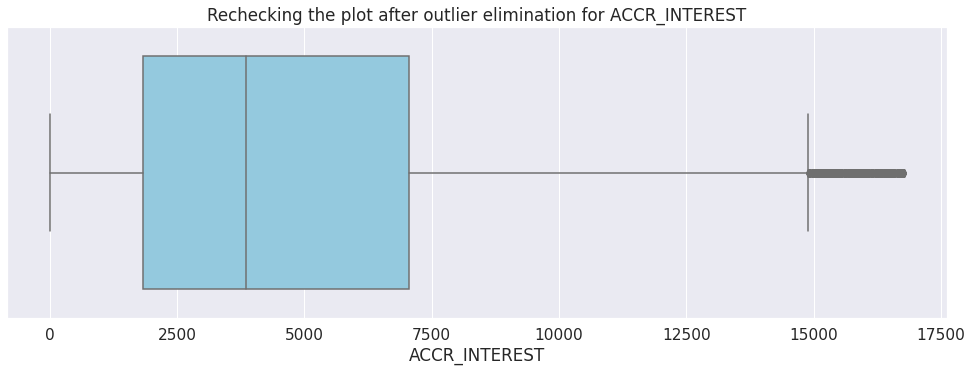

In [ ]:
plt.figure(figsize=(15,5))

fig_outlier_four = sns.boxplot(x = pawndata_CCC["ACCR_INTEREST"], color = 'skyblue').set(title = "Rechecking the plot after outlier elimination for ACCR_INTEREST")

plt.show()

In [ ]:
Before = pawndata.shape
After = pawndata_CCC.shape

print("Dataset size BEFORE removing Outliers, is")
print(Before)

print("Dataset size AFTER removing Outliers, is")
print(After)

Dataset size BEFORE removing Outliers, is
(23718, 16)
Dataset size AFTER removing Outliers, is
(20544, 16)


#### **Exploratory Data Analysis**

In [ ]:
pawndata_CCC.head(3)

,TICKETNO,ADV_DATE,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,TICKET_AGE,CLASSIFI_BUCKET
0,40095548,31-Oct-22,4,30100.00,2.47,30100.00,309.25,0.0,21.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A
1,60179907,31-Oct-22,6,66116.11,10.36,66116.11,679.28,0.0,21.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A
2,30070656,31-Oct-22,3,180000.00,14.80,180000.00,1849.32,0.0,21.0,25.0,Pawning - Normal Scheme,F,Consumption,Consumption,0,1A


[Text(0.5, 1.0, 'Distribution of Capital Portfolio')]

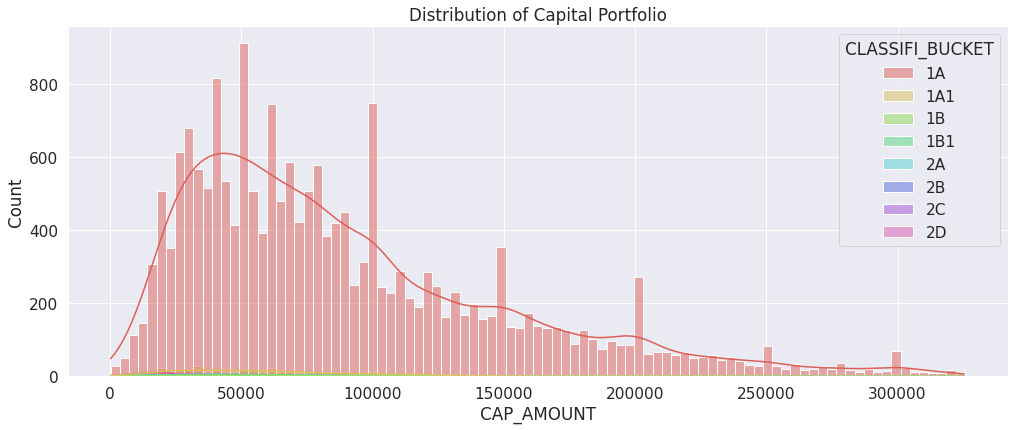

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data= pawndata_CCC, x="CAP_AMOUNT", binwidth=3500,kde=True,hue="CLASSIFI_BUCKET",palette = "hls").set(title = "Distribution of Capital Portfolio")

[Text(0.5, 1.0, 'Distribution of Capital Portfolio')]

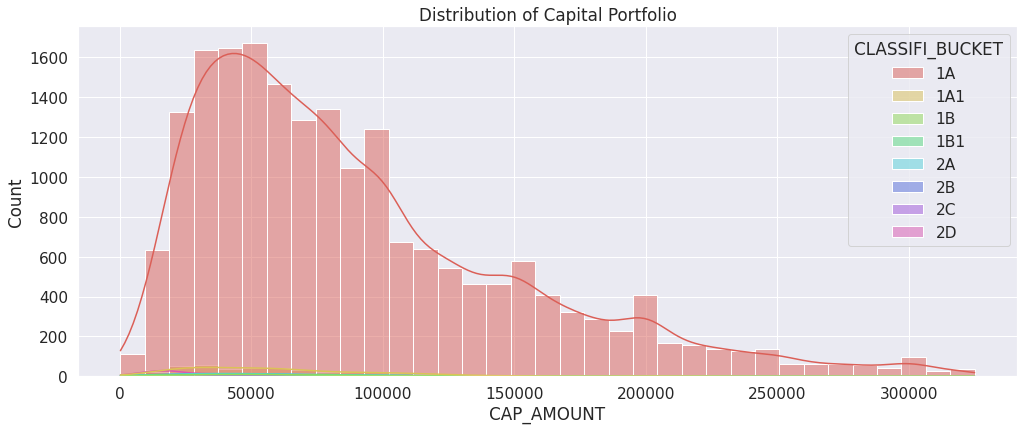

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data= pawndata_CCC, x="CAP_AMOUNT", bins=35,kde=True,hue="CLASSIFI_BUCKET",palette = "hls").set(title = "Distribution of Capital Portfolio")

[Text(0.5, 1.0, 'Distribution of Capital Portfolio')]

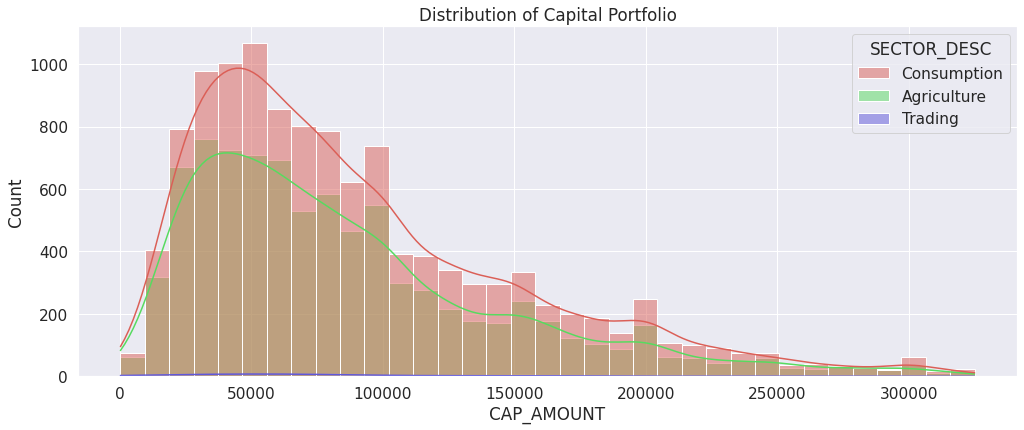

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data= pawndata_CCC, x="CAP_AMOUNT", bins=35,kde=True,hue="SECTOR_DESC",palette = "hls").set(title = "Distribution of Capital Portfolio")

[Text(0.5, 1.0, 'Distribution of Interest Payable')]

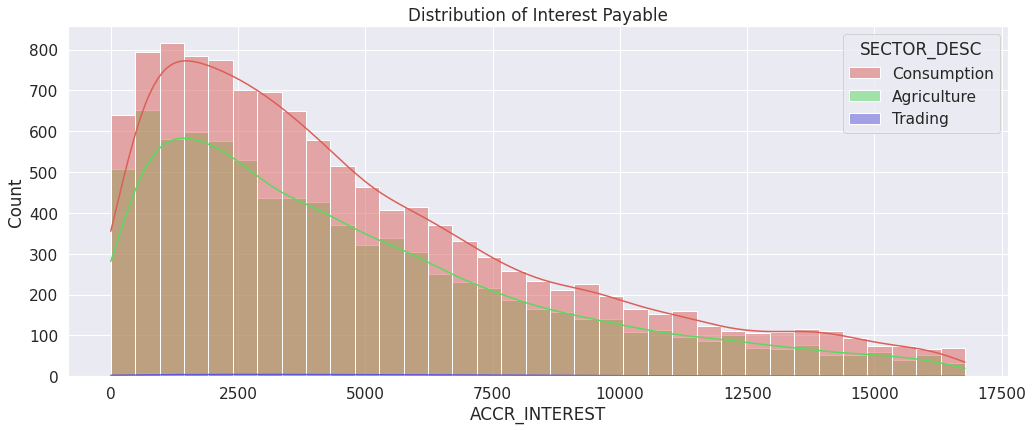

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data= pawndata_CCC, x="ACCR_INTEREST", bins=35,kde=True,hue="SECTOR_DESC",palette = "hls").set(title = "Distribution of Interest Payable")

[Text(0.5, 1.0, 'Sector Wise Capital Recovery Analysis')]

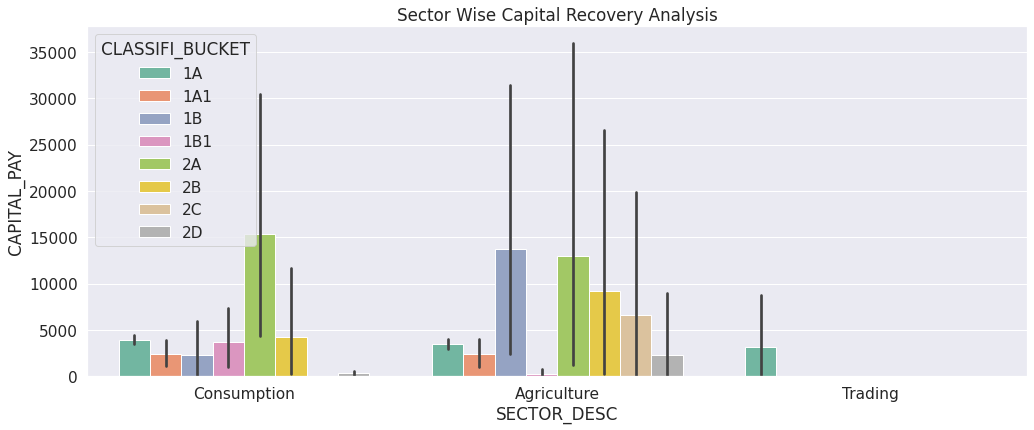

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="SECTOR_DESC", y="CAPITAL_PAY", hue="CLASSIFI_BUCKET", data=pawndata_CCC,palette = "Set2").set(title = "Sector Wise Capital Recovery Analysis")

In [ ]:
pawndataSET1 = pawndata_CCC.copy()

In [ ]:
conditions = [
    (pawndataSET1['CLASSIFI_BUCKET'] == '1A'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '1A1'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '1B'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '1B1'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '2A'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '2B'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '2C'),
    (pawndataSET1['CLASSIFI_BUCKET'] == '2D')
    ]

values = ['Performing', 'Performing', 'Performing', 'Performing','Non-performing','Non-performing','Non-performing','Non-performing']
pawndataSET1['NPA_STATUS'] = np.select(conditions, values)

In [ ]:
# Checking the assigning of values

test_df = pawndataSET1[pawndataSET1['CLASSIFI_BUCKET'] == '1A1']
test_df.head(2)

,TICKETNO,ADV_DATE,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,TICKET_AGE,CLASSIFI_BUCKET,NPA_STATUS
22568,100316326,30-Oct-21,10,66200.0,8.03,66200.0,6710.68,0.0,22.0,10.0,Pawning - Normal Scheme,F,Agriculture,Agriculture Others,366,1A1,Performing
22569,100316331,30-Oct-21,10,70200.0,9.71,70200.0,7116.16,0.0,20.0,10.0,Pawning - Normal Scheme,F,Agriculture,Agriculture Others,366,1A1,Performing


In [ ]:
pawndataSET1.shape

(20544, 17)

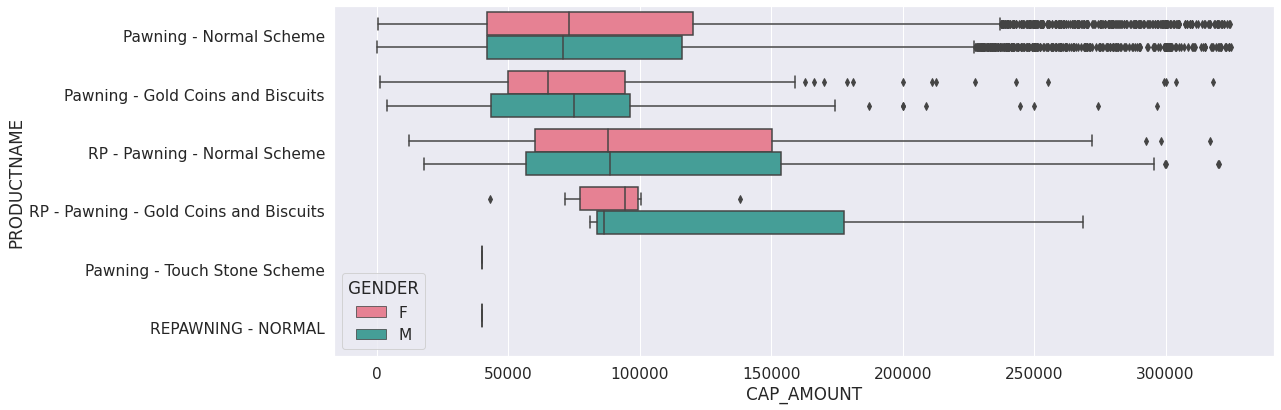

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x="CAP_AMOUNT", y="PRODUCTNAME", data=pawndataSET1, hue = "GENDER",palette = "husl")

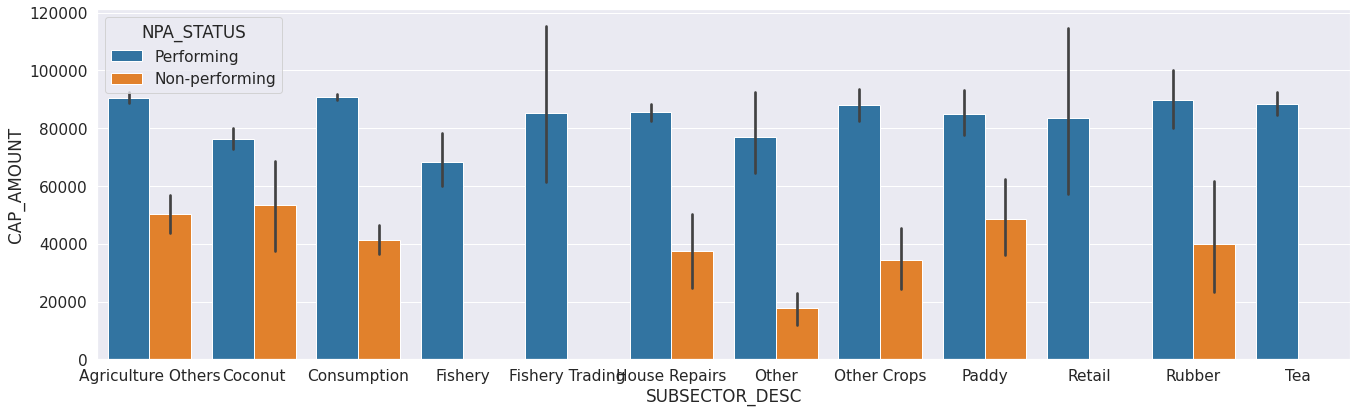

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(
    data=pawndataSET1.sort_values("SUBSECTOR_DESC"),
    x="SUBSECTOR_DESC", y="CAP_AMOUNT",hue = "NPA_STATUS", palette= "tab10")




[Text(0.5, 1.0, 'TICKET_AGE Analysis for Product Types')]

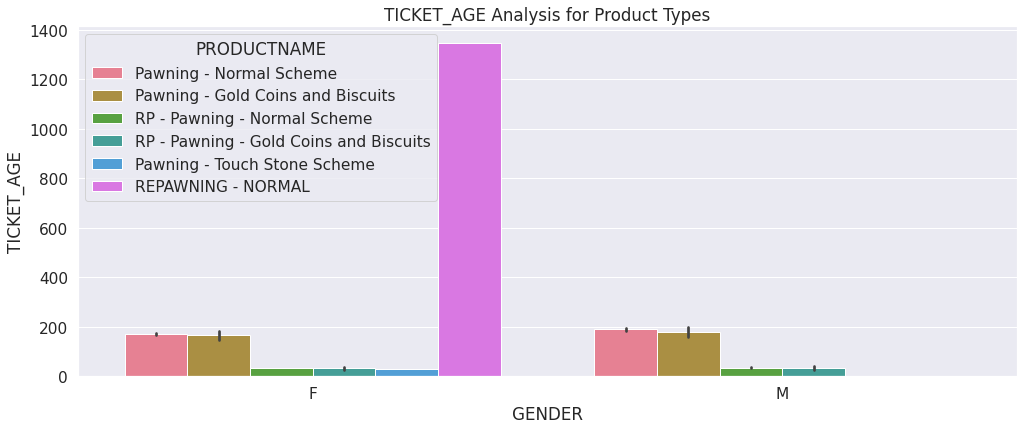

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=pawndataSET1, x="GENDER", y="TICKET_AGE", hue="PRODUCTNAME",palette = "husl").set(title = "TICKET_AGE Analysis for Product Types")


[Text(0.5, 1.0, 'Bucket wise Loan Outstanding')]

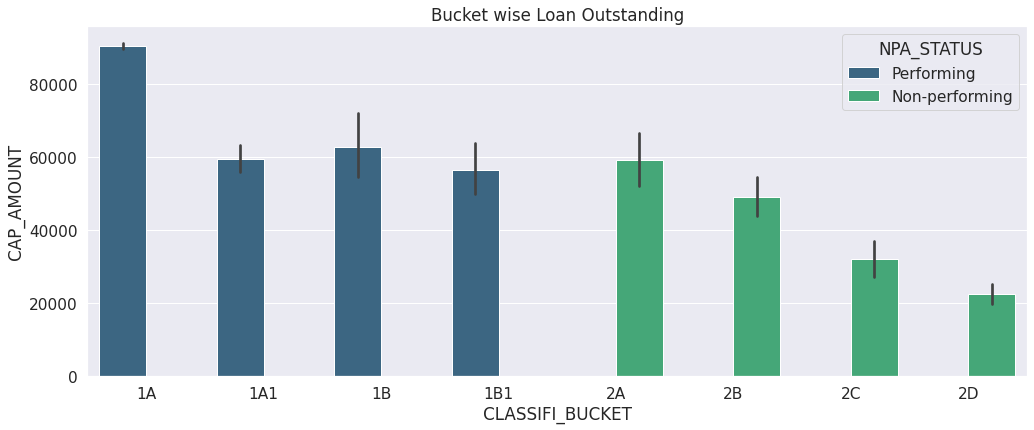

In [ ]:
plt.figure(figsize=(15,6))

sns.barplot(x="CLASSIFI_BUCKET", y="CAP_AMOUNT", hue="NPA_STATUS", data=pawndataSET1,palette = "viridis").set(title = "Bucket wise Loan Outstanding")

In [ ]:

char_cols = pawndataSET1.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    pawndataSET1[c] = pd.factorize(pawndataSET1[c])[0]
pawndataSET1.head(5)

,TICKETNO,ADV_DATE,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,TICKET_AGE,CLASSIFI_BUCKET,NPA_STATUS
0,40095548,0,4,30100.00,2.47,30100.00,309.25,0.0,21.0,25.0,0,0,0,0,0,0,0
1,60179907,0,6,66116.11,10.36,66116.11,679.28,0.0,21.0,25.0,0,0,0,0,0,0,0
2,30070656,0,3,180000.00,14.80,180000.00,1849.32,0.0,21.0,25.0,0,0,0,0,0,0,0
3,100329012,0,10,123539.00,15.62,123539.00,1269.24,0.0,19.0,25.0,0,0,0,0,0,0,0
4,50158494,0,5,130000.00,13.93,130000.00,1335.62,0.0,18.0,25.0,0,0,1,1,0,0,0


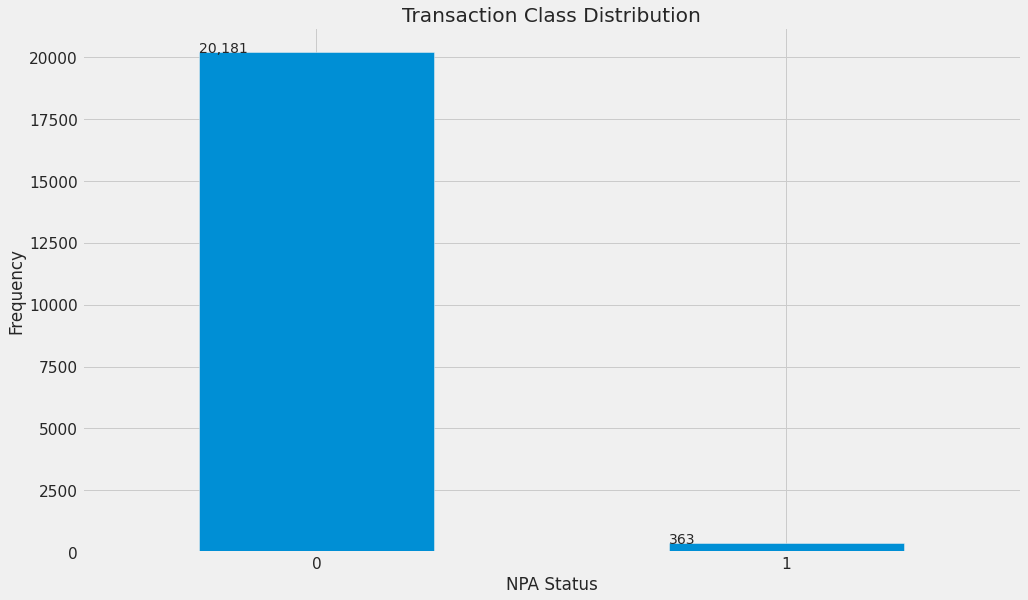

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

count_classes = pd.value_counts(pawndataSET1['NPA_STATUS'], sort = True)
ax = count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("NPA Status")
plt.ylabel("Frequency")

# To print the number of npa's

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

sns.set()

The dataset is skewed and need to be treated well for better performance of the machine learning models.

In [ ]:
pawndataSET2= pawndataSET1.drop(['TICKETNO'], axis=1)

In [ ]:
pawndataSET2.head(3)

,ADV_DATE,BRANCHID,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,TICKET_AGE,CLASSIFI_BUCKET,NPA_STATUS
0,0,4,30100.00,2.47,30100.00,309.25,0.0,21.0,25.0,0,0,0,0,0,0,0
1,0,6,66116.11,10.36,66116.11,679.28,0.0,21.0,25.0,0,0,0,0,0,0,0
2,0,3,180000.00,14.80,180000.00,1849.32,0.0,21.0,25.0,0,0,0,0,0,0,0


In [ ]:
pawndataSET2.shape

(20544, 16)

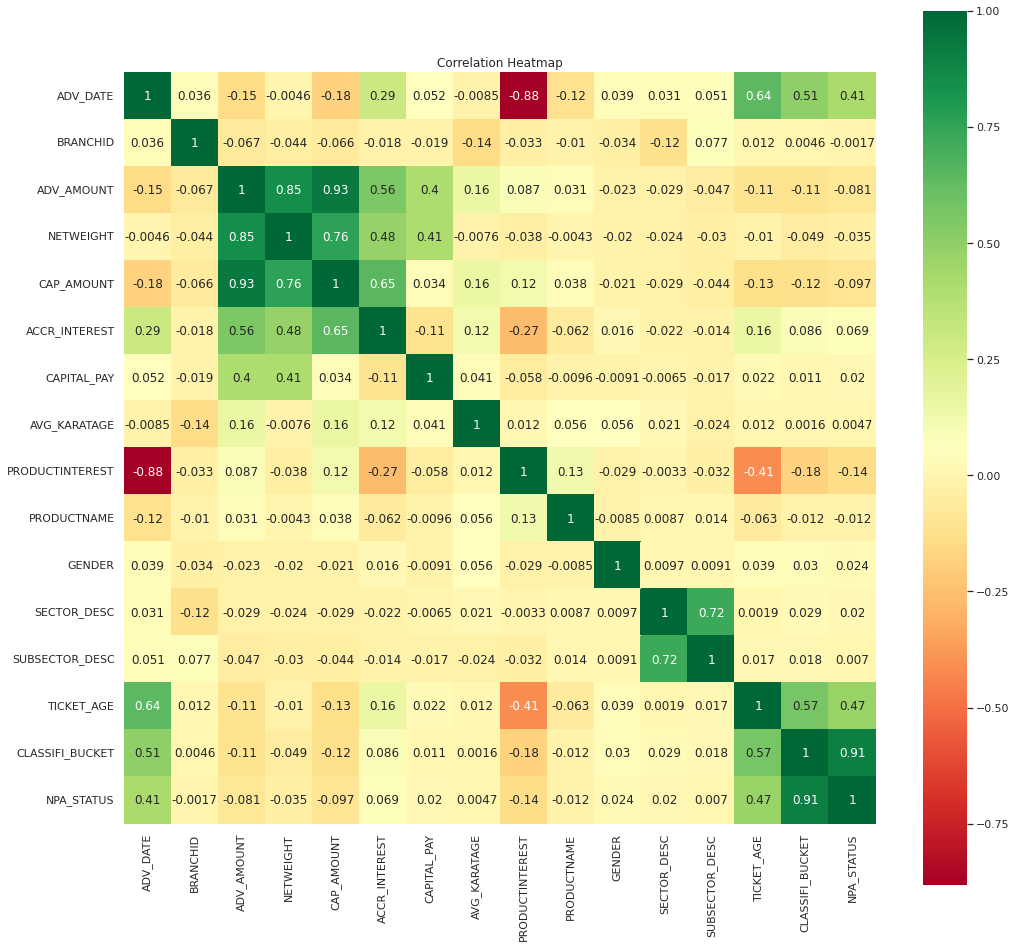

In [ ]:
correlation= pawndataSET2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

Cluster Analysis

In [ ]:
x = pawndataSET2.iloc[:, [4, 6]].values #'CAP_AMOUNT','ACCR_INTEREST', 'CAPITAL_PAY',

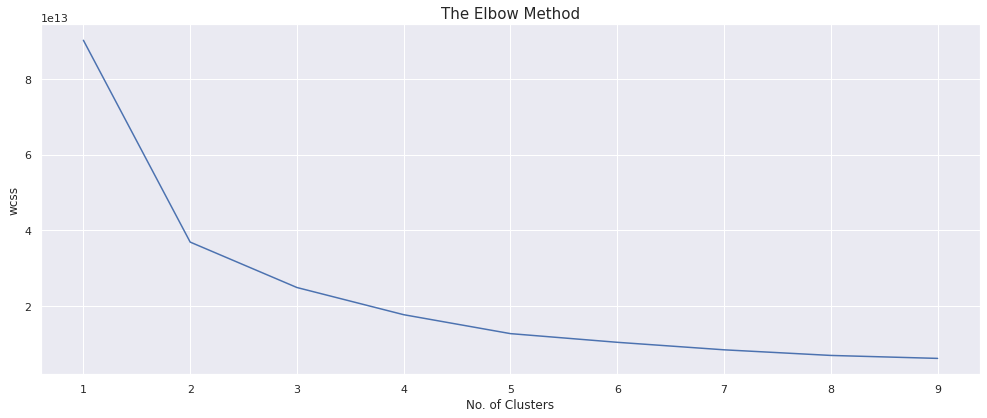

In [ ]:
#Cluster Analysis

plt.figure(figsize=(15,6))

from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

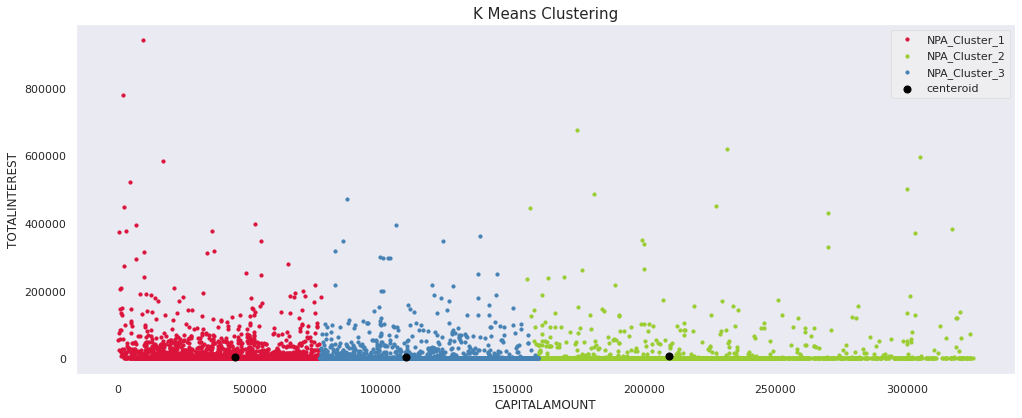

In [ ]:
plt.figure(figsize=(15,6))

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 10, c = 'crimson', label = 'NPA_Cluster_1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 10, c = 'yellowgreen', label = 'NPA_Cluster_2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 10, c = 'steelblue', label = 'NPA_Cluster_3')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 10, c = 'gold', label = 'NPA_Cluster_4')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 10, c = 'gold', label = 'NPA_Cluster_5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('CAPITALAMOUNT')
plt.ylabel('TOTALINTEREST')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# Dropping columns

pawndataSET3= pawndataSET2.drop(['CLASSIFI_BUCKET'], axis=1)

In [ ]:
pawndataSET3= pawndataSET3.drop(['BRANCHID'], axis=1)

In [ ]:
pawndataSET3= pawndataSET3.drop(['TICKET_AGE'], axis=1)

In [ ]:
pawndataSET3= pawndataSET3.drop(['ADV_DATE'], axis=1)

In [ ]:
pawndataSET3.shape

(20544, 12)

In [ ]:
pawndataSET3.tail()

,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,NPA_STATUS
23713,11000.0,11.05,10962.0,1706.49,38.0,20.0,26.04,0,1,0,0,1
23714,3300.0,4.25,3300.0,1069.19,0.0,20.0,26.04,0,1,0,0,1
23715,5200.0,8.36,5200.0,1686.79,0.0,22.0,26.04,0,1,0,0,1
23716,2800.0,7.01,2800.0,908.90,0.0,18.0,26.04,0,1,2,9,1
23717,3000.0,7.40,3000.0,973.82,0.0,19.5,26.04,0,1,0,0,1


### Handling Imbalanced Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pawndataSET3)
X = scaler.transform(pawndataSET3)

In [ ]:
# Define the target variable (dependent variable)

y = pawndataSET3.NPA_STATUS

In [ ]:
# # Splitting training and testing data

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(pawndataSET3, y, test_size = 0.30)

In [ ]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, Y_resampled = rus.fit_resample(X, y)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (726, 12)
Resampled shape of Y:  (726,)
Counter({0: 363, 1: 363})


**Model 01 - Considered all features in the dataset**

In [ ]:
# Applying Support Vector Machine algorithm

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_X, train_Y)

SVC(kernel='linear')

In [ ]:
# Predicting part, applying the model to predict

y_pred = svclassifier.predict(test_X)
# train_acc = accuracy_score(y_train, train_yhat)
# train_scores.append(train_acc)

In [ ]:
# Evaluating model performance

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,y_pred))
print(classification_report(test_Y,y_pred))

# Since this model does not give any probability we need to do it sepeately.
#This is what doing here.

[[119   0]
 [  0  99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        99

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(test_Y,y_pred))

1.0


In [ ]:
from sklearn.model_selection import cross_val_score  # have a good range of accuracy
scores = cross_val_score(svclassifier, X, y, cv=10, scoring='accuracy')
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Model 02 - PCA and SVM - Only 06 features were selected**

In [ ]:
pawndataSET3.shape

(20544, 12)

In [ ]:
# x = pawndataSET3.iloc[:,0:10].values
# y = pawndataSET3.NPA_STATUS

In [ ]:
x = X_resampled
y = Y_resampled

In [ ]:
x_std = StandardScaler().fit_transform(x)

In [ ]:
mean_vec = np.mean(x_std, axis = 0)
cov_mat = (x_std-mean_vec).T.dot((x_std-mean_vec))/(x_std.shape[0]-1)

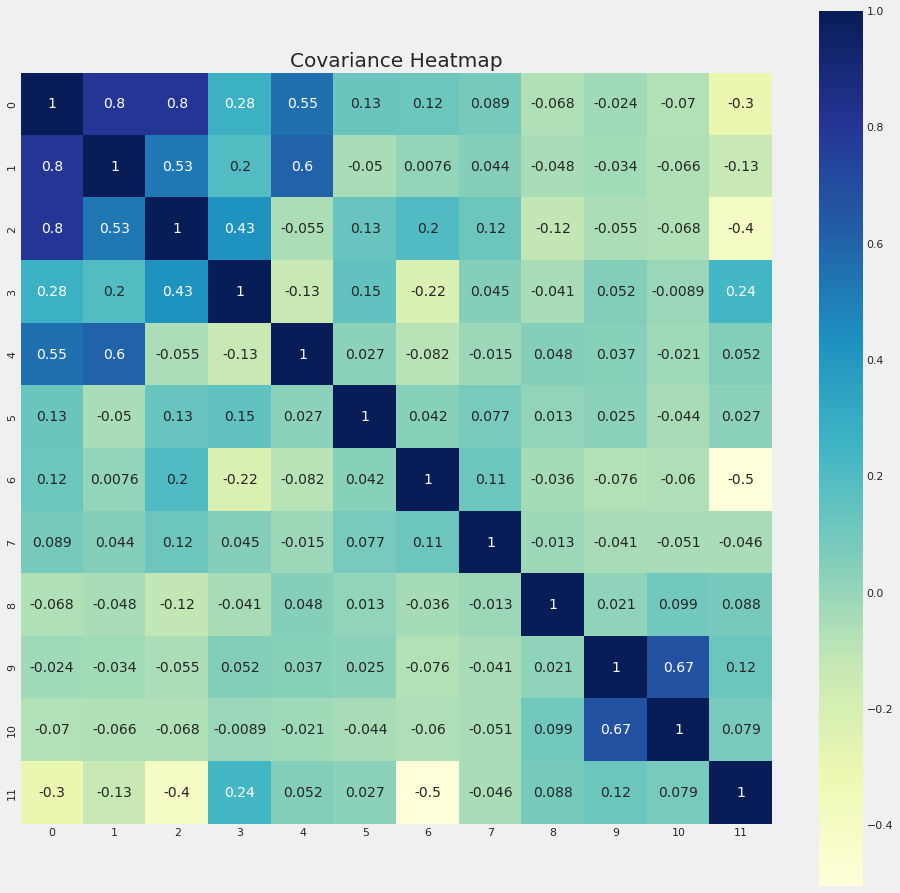

In [ ]:
plt.figure(figsize= (15,15))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='YlGnBu')
plt.title('Covariance Heatmap')
plt.show()

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
var_exp

[24.552775250160234,
 15.400084774853273,
 12.680458168735004,
 12.007519284982122,
 8.811491915247355,
 7.855278118549128,
 7.609049602952539,
 4.262797312112492,
 2.683793210494344,
 2.5022501997332363,
 1.634502162180302,
 -3.906083980356946e-15]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = None)
x_pca = pca.fit_transform(x_std)
x_pca

array([[ 2.71071875e+00,  1.68157606e-01,  1.39459008e+00, ...,
         7.99530445e-01, -2.79744313e-01,  3.69874523e-15],
       [ 4.91026031e-01, -8.45886714e-01, -5.97577642e-01, ...,
        -5.55686751e-01,  5.39714505e-02,  8.17172952e-16],
       [ 8.48534024e-01, -1.73256091e+00,  2.35533160e-01, ...,
        -1.75221289e-01,  6.60195051e-02, -3.87608566e-16],
       ...,
       [-1.27021800e+00, -1.35700543e+00, -1.82755241e-01, ...,
         3.86544156e-01,  5.08618977e-01,  1.36000310e-16],
       [-2.30064570e+00,  2.12206063e+00,  4.16814272e+00, ...,
         3.47936154e-01,  2.27884745e-01,  1.75522193e-16],
       [-1.48126442e+00, -1.46301919e+00, -9.28754106e-02, ...,
         4.56179555e-01,  2.56267681e-01,  3.16319848e-16]])

In [ ]:
x_pca.shape

(726, 12)

In [ ]:
# plt.figure(figsize=(15,6))
# plt.bar(range(10), var_exp, alpha = 0.5, align = 'center')
# plt.xlabel('Principal Components')
# plt.ylabel('Explained Variances')
# plt.show()

In [ ]:
pca1=PCA(n_components=6)
x_pca1=pca1.fit_transform(x_std)
x_pca1

array([[ 2.71071875,  0.16815761,  1.39459008, -0.66854413, -0.14484604,
        -1.28363093],
       [ 0.49102603, -0.84588671, -0.59757764,  0.48858122, -2.26134922,
         0.40656933],
       [ 0.84853402, -1.73256091,  0.23553316, -0.07797798, -0.2324023 ,
         0.3834103 ],
       ...,
       [-1.270218  , -1.35700543, -0.18275524,  0.55006117,  1.97529162,
        -0.48939531],
       [-2.3006457 ,  2.12206063,  4.16814272,  0.85511367,  0.71069764,
         0.0427578 ],
       [-1.48126442, -1.46301919, -0.09287541,  1.01120405,  1.28754295,
        -0.46178094]])

In [ ]:
pca_df=pd.DataFrame(x_pca1, columns=['PC1','PC2', 'PC3', 'PC4','PC5','PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.710719,0.168158,1.394590,-0.668544,-0.144846,-1.283631
1,0.491026,-0.845887,-0.597578,0.488581,-2.261349,0.406569
2,0.848534,-1.732561,0.235533,-0.077978,-0.232402,0.383410
3,1.250611,-0.431498,2.751027,-0.130375,-0.236716,0.534018
4,2.463583,-0.118304,-0.700035,-0.648002,-0.346735,-1.423328


**SVM**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size = 0.30)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[118   1]
 [  4  95]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.99      0.96      0.97        99

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218



In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9770642201834863


Text(0.5, 27.85999999999997, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

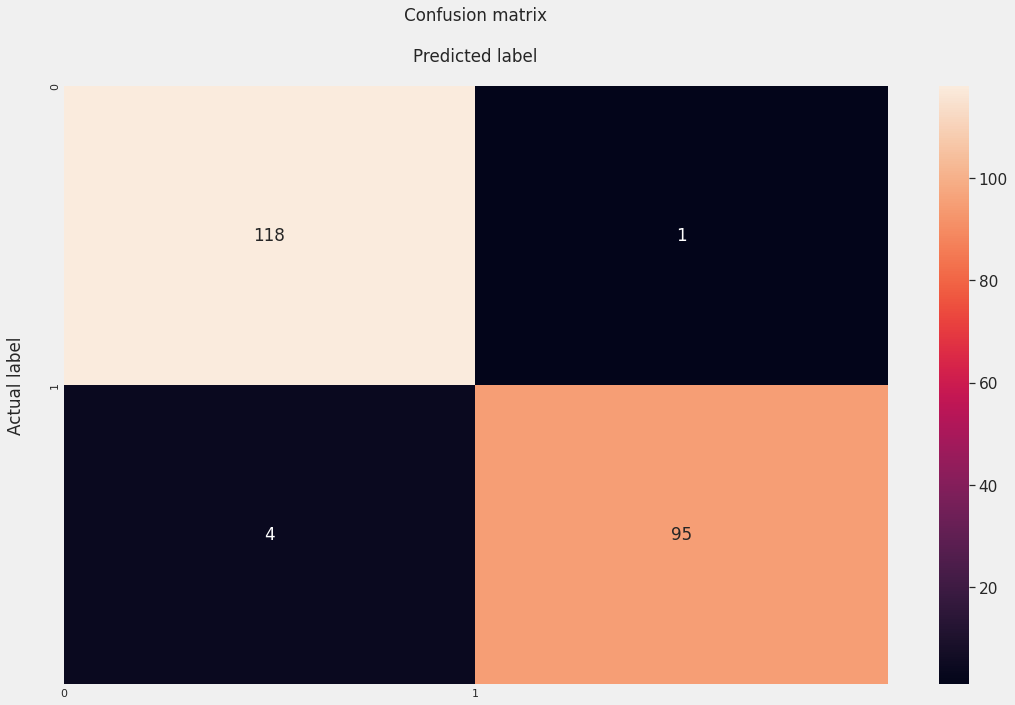

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

**Model 03 - Logistic Regression done with PCA selected features**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = pca_df
y = Y_resampled


In [ ]:
#Model Evaluation using train/test split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [ ]:
# create X (features) and y (response) with original features before feature selection
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
#Using AUC-ROC
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)
y_pred2 = logreg.predict(X_test2)
y_pred_proba2 = logreg.predict_proba(X_test2)[:, 1] #proba Returns the probability of the sample for each class in the model
[fpr, tpr, thr] = roc_curve(y_test2, y_pred_proba2) #thr means the array of thresholds used to calculate TPR and FPR. (The thresholds used to classify an instance is belongs to FRP or TPR)

In [ ]:
#Finding Acuracy score with the originally input features
accuracy_score(y_test2, y_pred2)

0.9724770642201835

In [ ]:
pawndataSET3.head()

,ADV_AMOUNT,NETWEIGHT,CAP_AMOUNT,ACCR_INTEREST,CAPITAL_PAY,AVG_KARATAGE,PRODUCTINTEREST,PRODUCTNAME,GENDER,SECTOR_DESC,SUBSECTOR_DESC,NPA_STATUS
0,30100.00,2.47,30100.00,309.25,0.0,21.0,25.0,0,0,0,0,0
1,66116.11,10.36,66116.11,679.28,0.0,21.0,25.0,0,0,0,0,0
2,180000.00,14.80,180000.00,1849.32,0.0,21.0,25.0,0,0,0,0,0
3,123539.00,15.62,123539.00,1269.24,0.0,19.0,25.0,0,0,0,0,0
4,130000.00,13.93,130000.00,1335.62,0.0,18.0,25.0,0,0,1,1,0


**Model 04 - with RFECV feature selection**

In [ ]:
X = pd.DataFrame(X_resampled)
Y = pd.DataFrame(Y_resampled)

# X['NPA_Status'] = Y
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.368733,0.932365,1.557702,1.063742,-0.151227,-0.405450,0.499065,-0.158668,1.030950,1.142063,-0.122915,-0.134116
1,-0.243225,0.343773,-0.204077,0.538655,-0.151227,-2.475465,-1.207400,-0.158668,-0.969979,-0.846288,-0.598193,-0.134116
2,-0.063027,-0.048621,-0.007131,-0.218468,-0.151227,0.629558,0.499065,-0.158668,-0.969979,-0.846288,-0.598193,-0.134116
3,0.591742,-0.019769,0.708494,-0.855205,-0.151227,0.629558,1.181651,-0.158668,-0.969979,1.142063,1.302922,-0.134116
4,1.063631,1.078936,1.224242,1.435838,-0.151227,-0.405450,-1.207400,-0.158668,1.030950,-0.846288,-0.598193,-0.134116
...,...,...,...,...,...,...,...,...,...,...,...,...
721,-1.213931,-0.131716,-1.265623,-0.818716,-0.149711,0.629558,1.529770,-0.158668,1.030950,-0.846288,-0.598193,7.456208
722,-1.328743,-0.916505,-1.390487,-0.981324,-0.151227,0.629558,1.529770,-0.158668,1.030950,-0.846288,-0.598193,7.456208
723,-1.300413,-0.442170,-1.359523,-0.823743,-0.151227,1.664566,1.529770,-0.158668,1.030950,-0.846288,-0.598193,7.456208
724,-1.336198,-0.597973,-1.398635,-1.022222,-0.151227,-0.405450,1.529770,-0.158668,1.030950,3.130415,3.679315,7.456208


In [ ]:
Selected_features = ['CAP_AMOUNT','NETWEIGHT','ACCR_INTEREST','CAPITAL_PAY','AVG_KARATAGE','SECTOR_DESC','SUBSECTOR_DESC','PRODUCTINTEREST','PRODUCTNAME','GENDER']

XX = pawndataSET3[Selected_features]
yy = pawndataSET3['NPA_STATUS']


In [ ]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, Y_resampled = rus.fit_resample(XX, yy)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (726, 10)
Resampled shape of Y:  (726,)
Counter({0: 363, 1: 363})


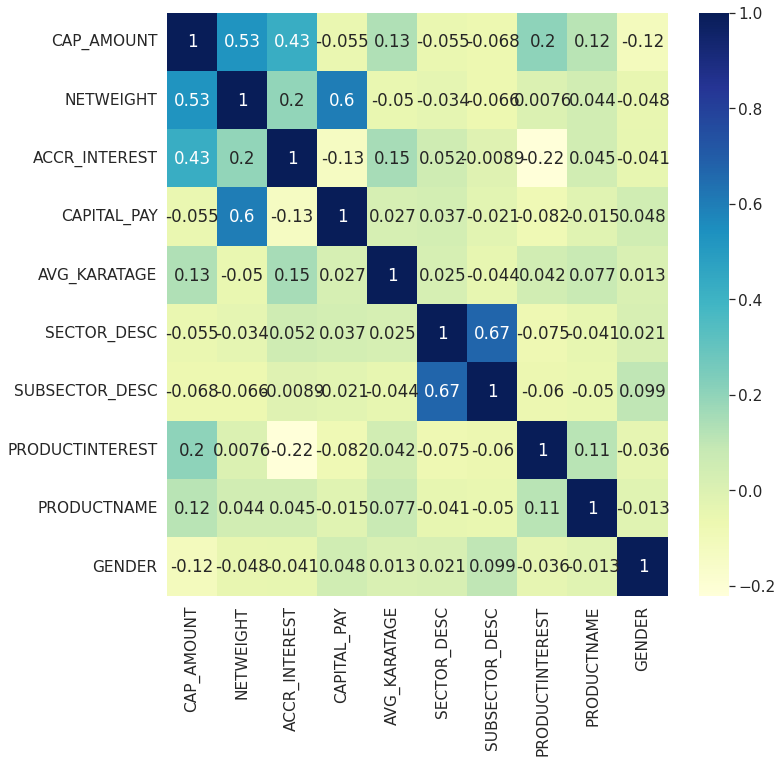

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X_resampled.corr(), annot=True, cmap="YlGnBu", vmax = 1)

plt.show()

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=20, scoring='accuracy')
rfecv.fit(X_resampled, Y_resampled)
rfecv.n_features_

10

In [ ]:
X_resampled.columns[rfecv.support_]

Index(['CAP_AMOUNT', 'NETWEIGHT', 'ACCR_INTEREST', 'CAPITAL_PAY',
       'AVG_KARATAGE', 'SECTOR_DESC', 'SUBSECTOR_DESC', 'PRODUCTINTEREST',
       'PRODUCTNAME', 'GENDER'],
      dtype='object')

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=2)

In [ ]:
#Using AUC-ROC
logreg01 = LogisticRegression()
logreg01.fit(X_train3, y_train3)
y_pred3 = logreg01.predict(X_test3)
y_pred_proba3 = logreg01.predict_proba(X_test3)[:, 1] #proba Returns the probability of the sample for each class in the model
[fpr, tpr, thr] = roc_curve(y_test3, y_pred_proba3)

In [ ]:
accuracy_score(y_test3, y_pred3)

0.8853211009174312

**Model 05 - PCA with 7 components**

In [ ]:
pca2=PCA(n_components=10)
x_pca2=pca2.fit_transform(x_std)
x_pca2

array([[ 2.71071875,  0.16815761,  1.39459008, ...,  0.27496721,
         0.593068  ,  0.79953044],
       [ 0.49102603, -0.84588671, -0.59757764, ..., -0.5525034 ,
         0.37044374, -0.55568675],
       [ 0.84853402, -1.73256091,  0.23553316, ...,  0.03723924,
        -0.23944623, -0.17522129],
       ...,
       [-1.270218  , -1.35700543, -0.18275524, ...,  1.6327644 ,
        -0.83825032,  0.38654416],
       [-2.3006457 ,  2.12206063,  4.16814272, ...,  1.68973792,
        -0.83747305,  0.34793615],
       [-1.48126442, -1.46301919, -0.09287541, ...,  1.73191708,
        -0.77321589,  0.45617956]])

In [ ]:
pca2_df=pd.DataFrame(x_pca2, columns=['PC1','PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca2_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.710719,0.168158,1.394590,-0.668544,-0.144846,-1.283631,0.756899,0.274967,0.593068,0.799530
1,0.491026,-0.845887,-0.597578,0.488581,-2.261349,0.406569,1.285284,-0.552503,0.370444,-0.555687
2,0.848534,-1.732561,0.235533,-0.077978,-0.232402,0.383410,-0.947567,0.037239,-0.239446,-0.175221
3,1.250611,-0.431498,2.751027,-0.130375,-0.236716,0.534018,-1.039359,0.132127,-0.644359,0.483924
4,2.463583,-0.118304,-0.700035,-0.648002,-0.346735,-1.423328,0.992187,-0.872638,0.119127,-0.165692


In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(pca2_df, y, test_size = 0.30)

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = svclassifier.predict(X_test4)

In [ ]:
print(metrics.accuracy_score(y_test4,y_pred4))

1.0


**Results**

**Target Variable : NPA_STATUS with no NPA dates and Classification Bucket**

Model 01 - Considered all features in the dataset
**1.0**

Model 02 - PCA and SVM - Only 06 features were selected
**0.9678899082568807**

Model 03 - Logistic Regression done with PCA selected features
**0.9724770642201835**

Model 04 - with RFECV feature selection
**0.8853211009174312**

Model 05 - PCA with 10 components
**1.0**

## Explainable AI - SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

### Explainable AI for MODEL 01

In [ ]:
Model = svclassifier

In [ ]:
background = shap.maskers.Independent(train_X, max_samples=1000)
explainer = shap.Explainer(svclassifier, background)
shap_values_m1 = explainer(train_X)

SHAP BAR PLOT


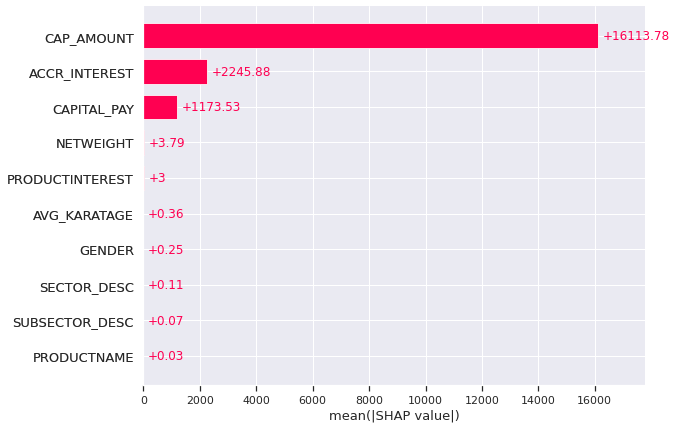

-------------------------------------------------------------------------------------------------------------
SHAP BEESWARM PLOT


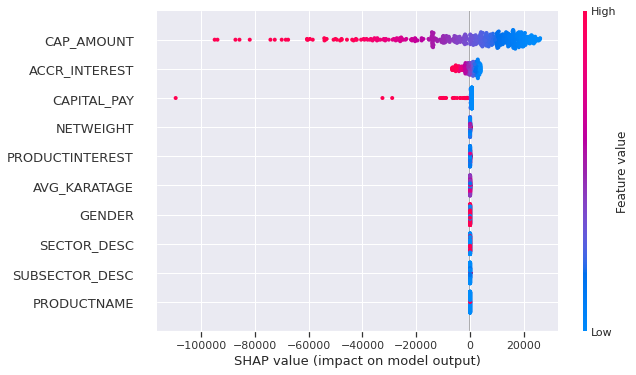

-------------------------------------------------------------------------------------------------------------
SHAP SUMMARY PLOT


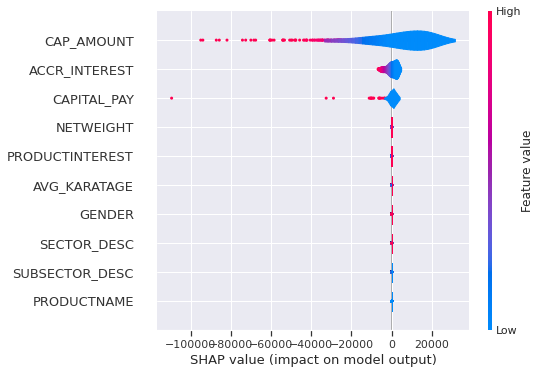

-------------------------------------------------------------------------------------------------------------
SHAP WATERFALL PLOT


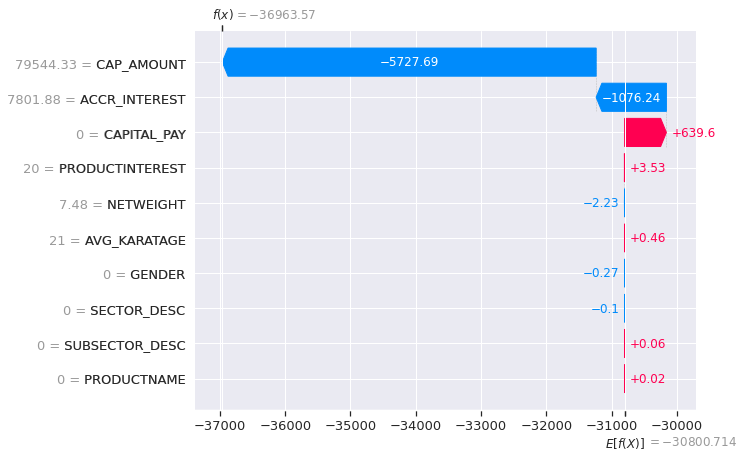

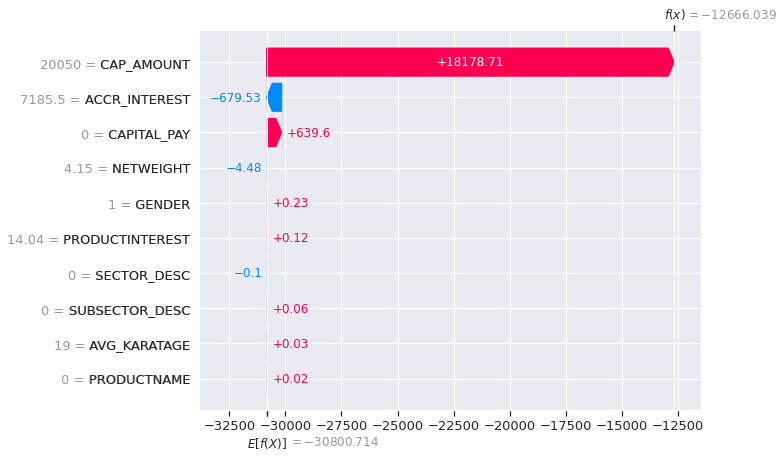

-------------------------------------------------------------------------------------------------------------
SHAP HEATMAP


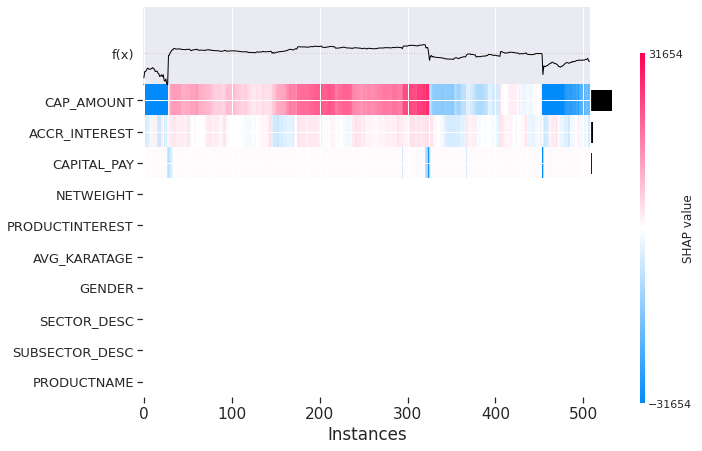

In [ ]:
print('SHAP BAR PLOT')
shap.plots.bar(shap_values_m1)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP BEESWARM PLOT')
shap.plots.beeswarm(shap_values_m1)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP SUMMARY PLOT')
shap.summary_plot(shap_values_m1, plot_type='violin')
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP WATERFALL PLOT')
shap.plots.waterfall(shap_values_m1[0], max_display=14)
shap.plots.waterfall(shap_values_m1[17], max_display=14)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP HEATMAP')
shap.plots.heatmap(shap_values_m1[:1000])

### Explainable AI for MODEL 02

In [ ]:
Model = svclassifier
background = shap.maskers.Independent(train_X, max_samples=1000)
explainer = shap.Explainer(svclassifier, background)
shap_values_m2 = explainer(train_X)

SHAP BAR PLOT


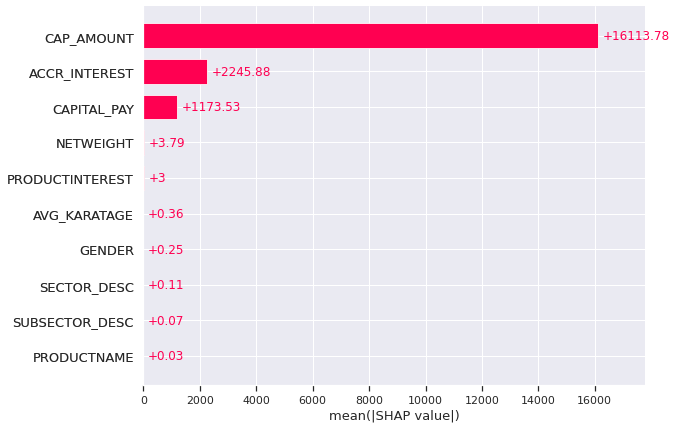

-------------------------------------------------------------------------------------------------------------
SHAP BEESWARM PLOT


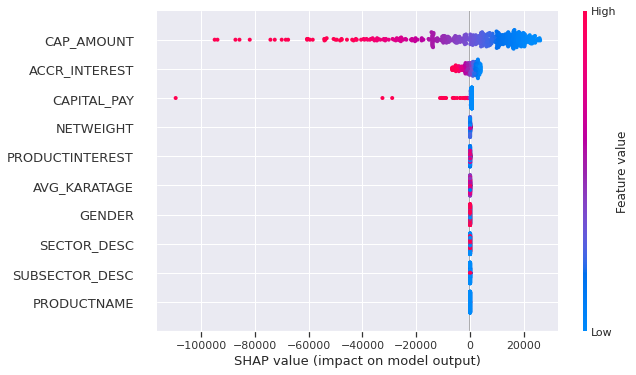

-------------------------------------------------------------------------------------------------------------
SHAP SUMMARY PLOT


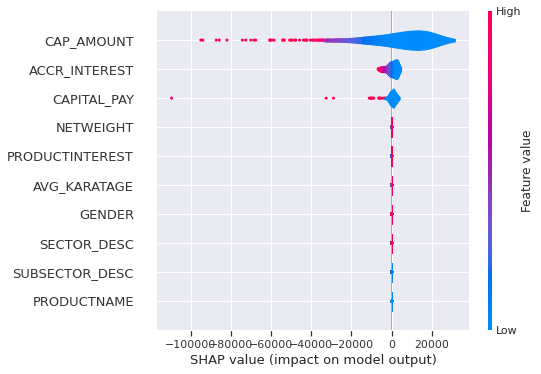

-------------------------------------------------------------------------------------------------------------
SHAP WATERFALL PLOT


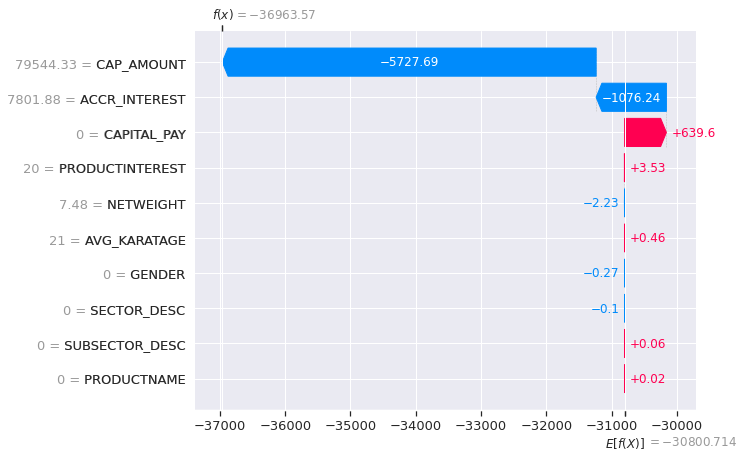

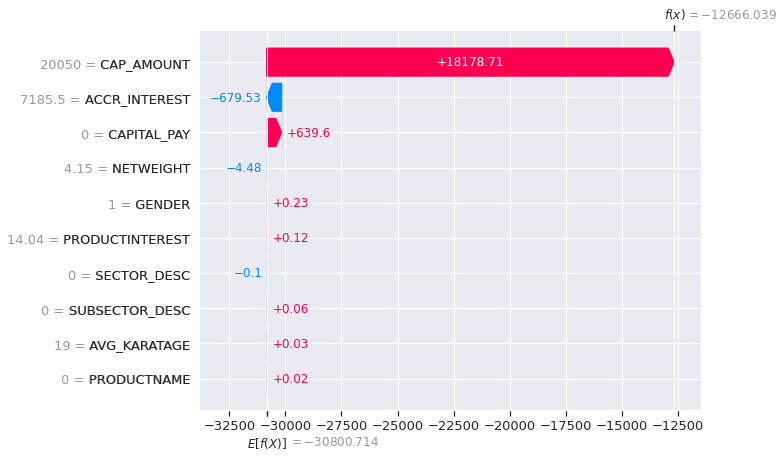

-------------------------------------------------------------------------------------------------------------
SHAP HEATMAP


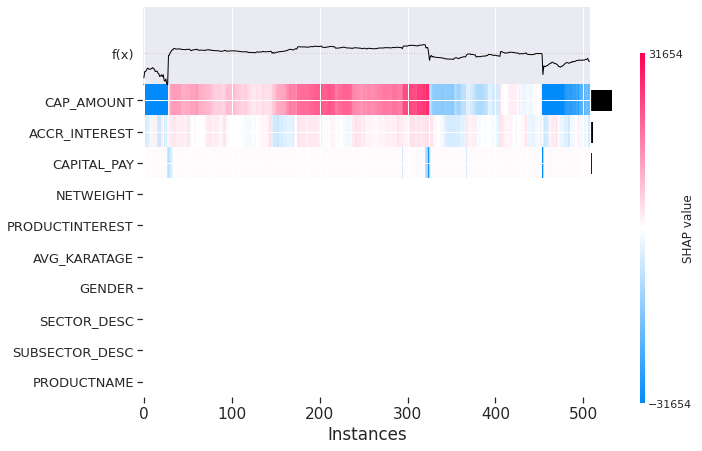

In [ ]:
print('SHAP BAR PLOT')
shap.plots.bar(shap_values_m2)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP BEESWARM PLOT')
shap.plots.beeswarm(shap_values_m2)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP SUMMARY PLOT')
shap.summary_plot(shap_values_m2, plot_type='violin')
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP WATERFALL PLOT')
shap.plots.waterfall(shap_values_m2[0], max_display=14)
shap.plots.waterfall(shap_values_m2[17], max_display=14)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP HEATMAP')
shap.plots.heatmap(shap_values_m2[:1000])

### Explainable AI for MODEL 03

In [ ]:
Model = logreg
background = shap.maskers.Independent(X_train2, max_samples=1000)
explainer = shap.Explainer(logreg, background)
shap_values_m3 = explainer(X_train2)

SHAP BAR PLOT


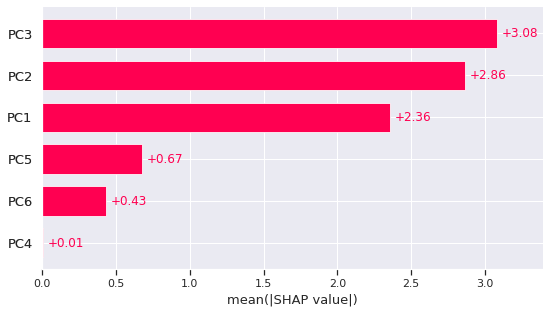

-------------------------------------------------------------------------------------------------------------
SHAP BEESWARM PLOT


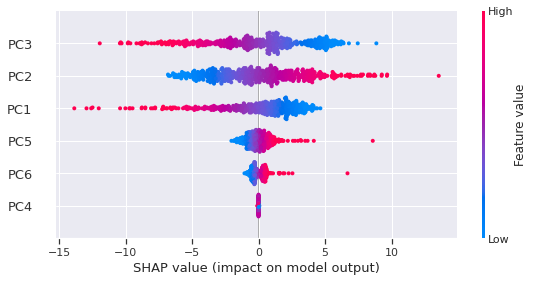

-------------------------------------------------------------------------------------------------------------
SHAP SUMMARY PLOT


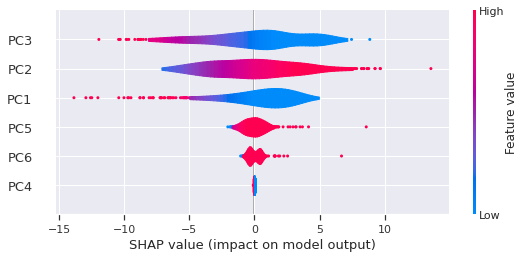

-------------------------------------------------------------------------------------------------------------
SHAP WATERFALL PLOT


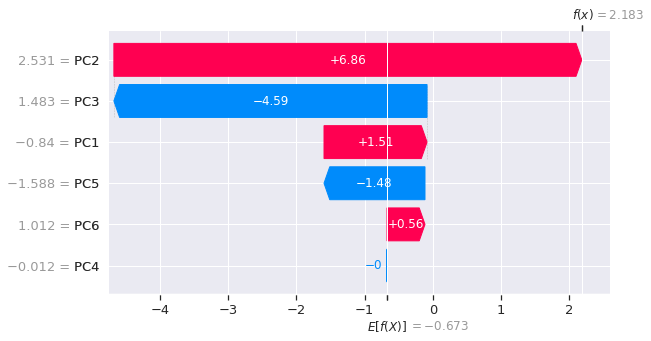

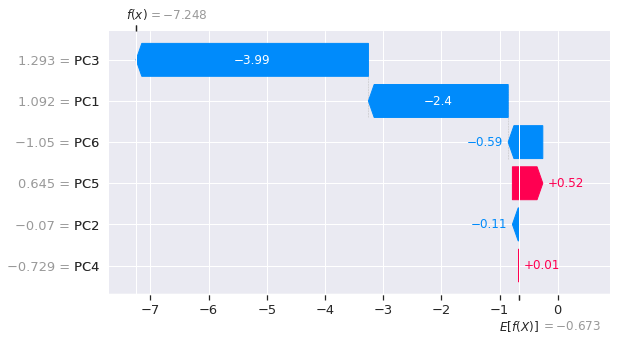

-------------------------------------------------------------------------------------------------------------
SHAP HEATMAP


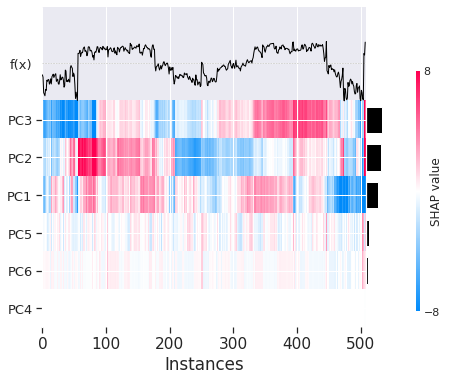

In [ ]:
print('SHAP BAR PLOT')
shap.plots.bar(shap_values_m3)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP BEESWARM PLOT')
shap.plots.beeswarm(shap_values_m3)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP SUMMARY PLOT')
shap.summary_plot(shap_values_m3, plot_type='violin')
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP WATERFALL PLOT')
shap.plots.waterfall(shap_values_m3[0], max_display=14)
shap.plots.waterfall(shap_values_m3[17], max_display=14)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP HEATMAP')
shap.plots.heatmap(shap_values_m3[:1000])

### Explainable AI for MODEL 04

In [ ]:
Model = logreg01
background = shap.maskers.Independent(X_train3, max_samples=1000)
explainer = shap.Explainer(logreg01, background)
shap_values_m4 = explainer(X_train3)

SHAP BAR PLOT


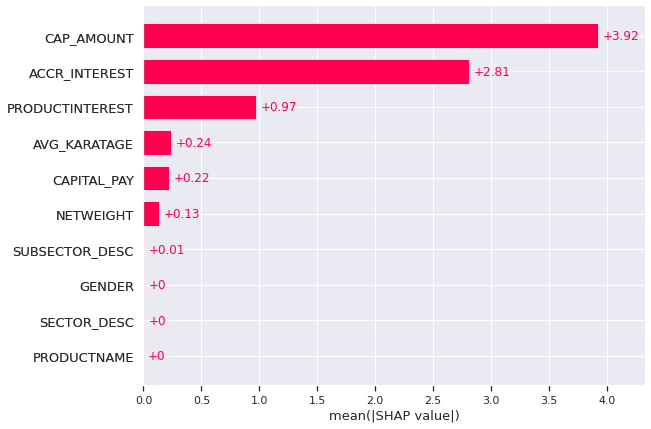

-------------------------------------------------------------------------------------------------------------
SHAP BEESWARM PLOT


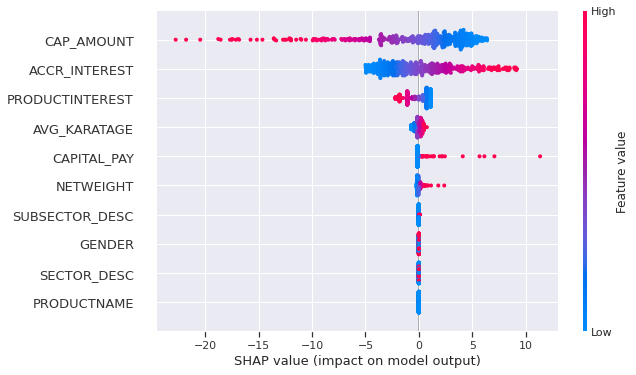

-------------------------------------------------------------------------------------------------------------
SHAP SUMMARY PLOT


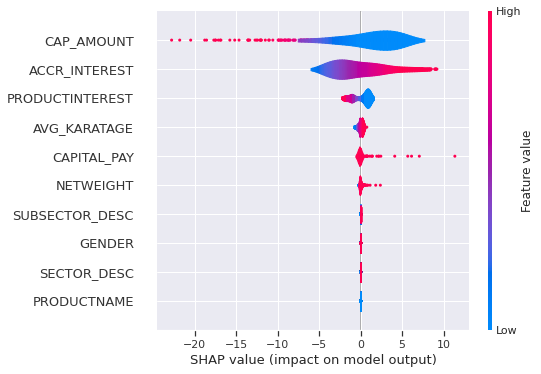

-------------------------------------------------------------------------------------------------------------
SHAP WATERFALL PLOT


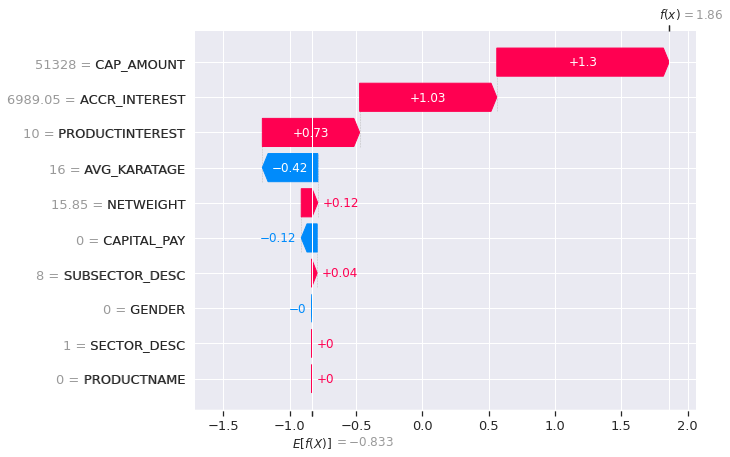

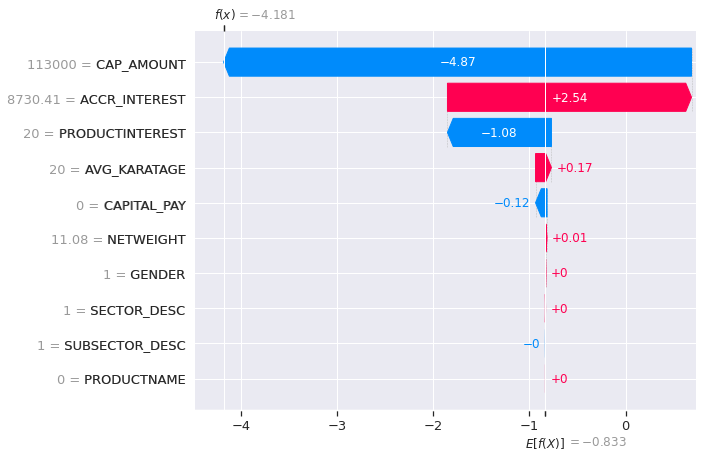

-------------------------------------------------------------------------------------------------------------
SHAP HEATMAP


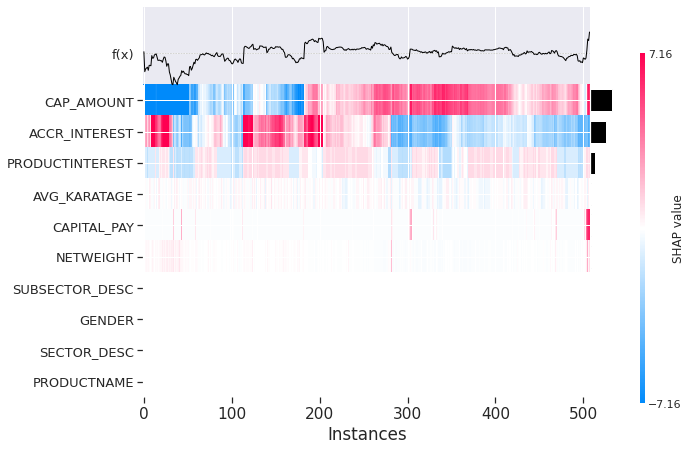

In [ ]:
print('SHAP BAR PLOT')
shap.plots.bar(shap_values_m4)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP BEESWARM PLOT')
shap.plots.beeswarm(shap_values_m4)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP SUMMARY PLOT')
shap.summary_plot(shap_values_m4, plot_type='violin')
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP WATERFALL PLOT')
shap.plots.waterfall(shap_values_m4[0], max_display=14)
shap.plots.waterfall(shap_values_m4[17], max_display=14)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP HEATMAP')
shap.plots.heatmap(shap_values_m4[:1000])

### Explainable AI for MODEL 05

In [ ]:
Model = svclassifier
background = shap.maskers.Independent(X_train4, max_samples=1000)
explainer = shap.Explainer(svclassifier, background)
shap_values_m5 = explainer(X_train4)

SHAP BAR PLOT


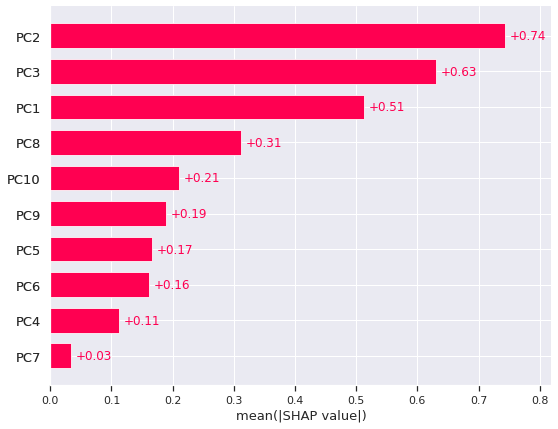

-------------------------------------------------------------------------------------------------------------
SHAP BEESWARM PLOT


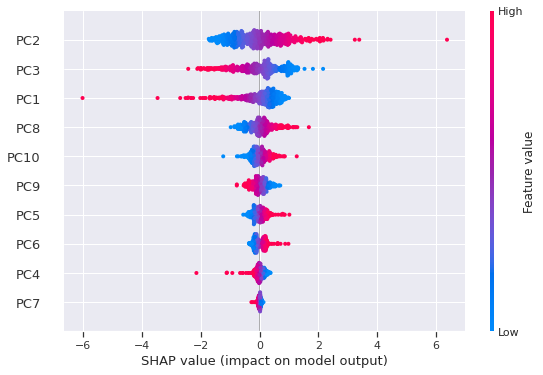

-------------------------------------------------------------------------------------------------------------
SHAP SUMMARY PLOT


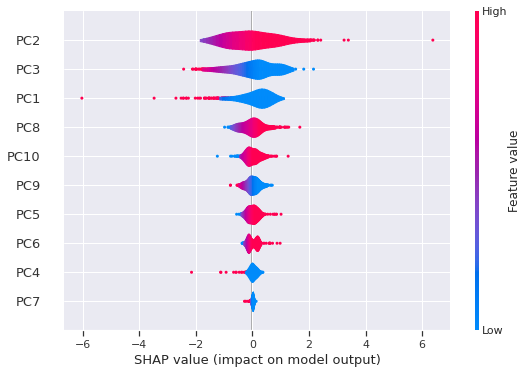

-------------------------------------------------------------------------------------------------------------
SHAP WATERFALL PLOT


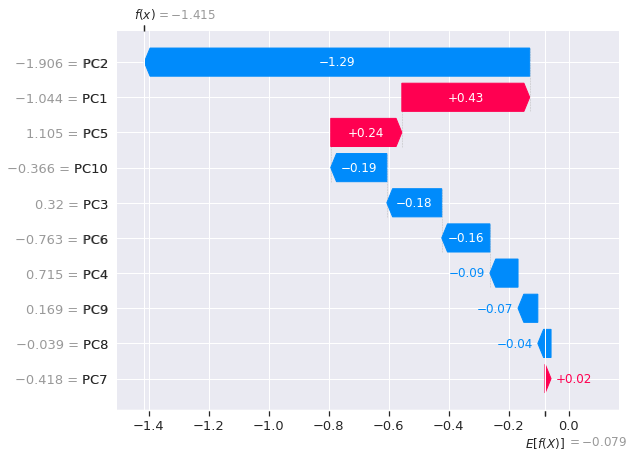

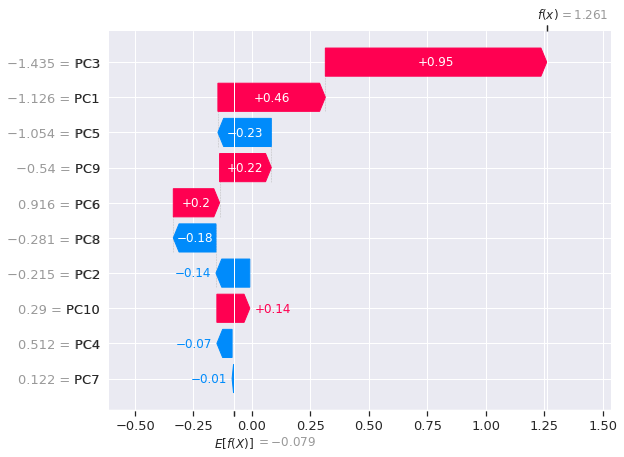

-------------------------------------------------------------------------------------------------------------
SHAP HEATMAP


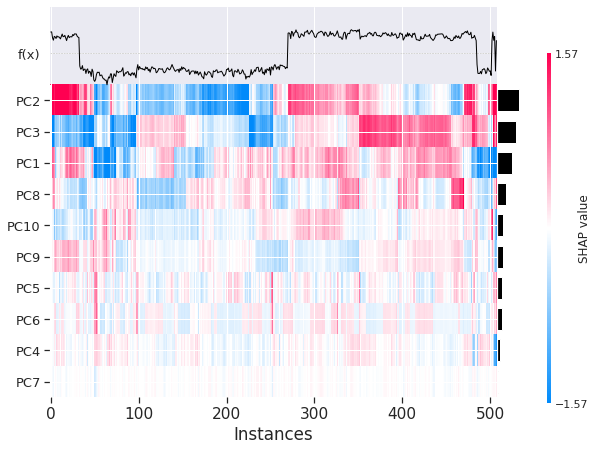

In [ ]:
print('SHAP BAR PLOT')
shap.plots.bar(shap_values_m5)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP BEESWARM PLOT')
shap.plots.beeswarm(shap_values_m5)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP SUMMARY PLOT')
shap.summary_plot(shap_values_m5, plot_type='violin')
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP WATERFALL PLOT')
shap.plots.waterfall(shap_values_m5[0], max_display=14)
shap.plots.waterfall(shap_values_m5[17], max_display=14)
print('-------------------------------------------------------------------------------------------------------------')

print('SHAP HEATMAP')
shap.plots.heatmap(shap_values_m5[:1000])